# Code 30 to Code 34

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('airline_dataset_csat.csv',low_memory=False,encoding = 'latin1')

In [3]:
df.head()

,line,class,csat_fnl
0,When can I web check-in?,check in,5
1,want to check in,check in,5
2,please check me in,check in,5
3,check in,check in,5
4,my flight is tomm can I check in,check in,5


Frequency distribution of queries is a quick insight into what are the trending topics and why do customers reaches out in general. For the examples here we will use our airlines dataset. We herewith create the data frame with frequency distribution of the labels. Please note the additional column “CSAT” in the “airline” dataset. This is the CSAT rating provided by the users. For charting we would be using “matlobplotlib” library 

Frequency Distribution of intents

Now we get the frequency distribution and plot the top queries with the absolute values

In [4]:
freq1= pd.DataFrame(df["class"].value_counts()).reset_index()
freq1.columns = ["class","counts"]
freq1["percent_count"] = freq1["counts"]/freq1["counts"].sum()
freq1

,class,counts,percent_count
0,login,105,0.263819
1,other,79,0.198492
2,baggage,76,0.190955
3,check in,61,0.153266
4,greetings,45,0.113065
5,thanks,16,0.040201
6,cancel,16,0.040201


We now plot the values using “pyplot” in matlab. “pyplot.bar” takes X and Y values to build the bar chart.

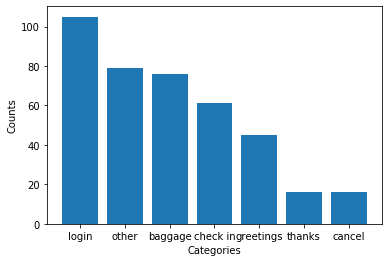

In [5]:
x_axis_lab = list(freq1["class"])
y_axis_lab = list(freq1["counts"])
y_per_axis_lab = list(freq1["percent_count"])

import matplotlib.pyplot as plt
plt.bar(x_axis_lab,y_axis_lab)
plt.ylabel('Counts')
plt.xlabel('Categories')
plt.show()

# Top CSAT drivers
Customer satisfaction is a survey that users answer at the end of a customer service interaction. This is generally on a scale of 1 to 5. By plotting CSAT responses by topics mined would give an idea on which are the “intents” customers are satisfied or dissatisfied with. In our airline dataset example, we classify customers as “satisfied” if they give a rating of 4 & 5. And any score of 1 to 3 the customers are considered to be “dissatisfied”. We classify the “csat_fnl” score based on this logic. We first cross tab the intent and satisfaction class (“satisfied”, “dissatisfied”)


# CSAT Distributon of intents with % Volume

In [6]:
df["sat"]=1
df.loc[df.csat_fnl<=3,"sat"]=0
ct = pd.crosstab(df["class"],df["sat"],normalize='index')

ct = ct.reset_index()
ct_cols = ct.columns
ct_cols1 = [ct_cols[0],"dissat","sat"]
ct.columns = ct_cols1
ct["label"] = ct["class"]

In [7]:
ct

,class,dissat,sat,label
0,baggage,0.394737,0.605263,baggage
1,cancel,0.437500,0.562500,cancel
2,check in,0.295082,0.704918,check in
3,greetings,0.311111,0.688889,greetings
4,login,0.371429,0.628571,login
5,other,0.417722,0.582278,other
6,thanks,0.312500,0.687500,thanks


We now plot a stacked bar chart with satisfaction and dissatisfaction. We use the intent percentage distribution as the secondary axis. In the “matplotlib” package we create “subplots” in order to show 2 y-axes. First we create the stacked bar for satisfied/dissatisfied using the parameter “bottom”. The “dissat” variable stacks on “csat” variable

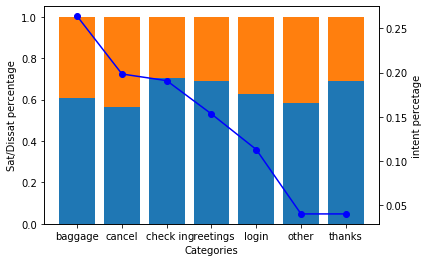

In [8]:
ct_sat = ct["sat"]
ct_dissat = ct["dissat"]
ind = ct["label"]

fig,ax=plt.subplots()
p1 = ax.bar(ind, ct_sat)
p2 = ax.bar(ind, ct_dissat, 
             bottom=ct_sat)
ax.set_xlabel('Categories')
ax.set_ylabel('Sat/Dissat percentage')


ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ind, y_per_axis_lab,color="blue",marker="o")

ax2.set_ylabel('intent percetage')
plt.show()